(PROGLINEAL)=

# 4.1 Programación lineal (PL) y método símplex

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker y `<versión imagen de docker>` por la versión más actualizada que se presenta en la documentación.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:<versión imagen de docker>`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:<versión imagen de docker>` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

```{admonition} Al final de esta nota la comunidad lectora:
:class: tip

* Conocerá el modelo de programación lineal, su interpretación y diferentes formas del mismo.

* Comprenderá el método gráfico y aspectos esenciales del método de símplex para resolver programas lineales.

* Aprenderá las definiciones de programación entera, mixta y binaria.

* Tendrá una lista de métodos heurísticos y meta heurísticas que ayudan a resolver problemas de optimización, en particular de optimización combinatoria.

```

```{sidebar} Un poco de historia ...

El desarrollo de la programación lineal (PL) ha sido clasificado como uno de los avances científicos más importantes de mediados del siglo XX. Es quizás el modelo prototipo de la optimización con restricciones. El efecto que ha tenido en la práctica y en áreas del conocimiento desde 1950 es en verdad grande. El tipo más común de aplicación abarca el problema general de asignar de la mejor manera posible, esto es, de forma óptima, recursos limitados a actividades que compiten entre sí por ellos. Con más precisión, se desea elegir el nivel de ciertas actividades que compiten por recursos escasos necesarios para realizarlas y se puedan asignar recursos a tales actividades. El desarrollo por Dantzig del método símplex para resolver programas lineales en los $40$'s marcó el inicio de la era moderna en optimización. 

La PL utiliza un modelo matemático para describir el problema. El adjetivo lineal significa que todas las funciones del modelo deben ser funciones lineales. En este caso, la palabra programación no se refiere a términos computacionales; en esencia es sinónimo de planeación. Por lo tanto, la PL involucra la planeación de actividades para obtener un resultado óptimo; esto es, el resultado que mejor alcance la meta establecida, de acuerdo con el modelo matemático, entre todas las alternativas factibles.

Aunque la asignación de recursos a las actividades es la aplicación más frecuente en PL, cualquier problema cuyo  modelo se ajuste al formato general del modelo de PL, es un problema de PL.

```

(FORMAESTPL)=

## Forma estándar de un PL

Un programa lineal (PL) **en su forma estándar** es un problema de optimización con una función lineal objetivo, un conjunto de restricciones lineales de igualdad y un conjunto de restricciones no negativas impuestas a las variables. Es un **modelo de optimización** de la forma:

$$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

donde: $c \in \mathbb{R}^n$ es un vector de costos, $A \in \mathbb{R}^{m \times n}$, se **asume** $m < n$ y tiene *rank* completo por renglones y la última desigualdad se refiere a que todas las componentes del vector $x \in \mathbb{R}^n$ son mayores o iguales a cero (son mayores o iguales a cero de una forma *pointwise*). La función objetivo es $f_o(x) = c^Tx$ y se busca minimizar el costo. El modelo anterior realiza suposiciones como son: proporcionalidad y aditividad para la función objetivo y restricciones. Tales supuestos se deben mantener respecto a las variables en $x$. La proporcionalidad se resume en que los exponentes de cada componente de $x$ deben ser igual a uno y la aditividad en cuanto a que las contribuciones individuales de las componentes de $x$ es su suma en la función objetivo y restricciones.

```{admonition} Comentario

El PL es un problema convexo pues una función lineal es convexa y cóncava al mismo tiempo. Obsérvese que la forma estándar de un problema convexo pide que el problema se escriba con desigualdades del tipo $\leq$. Tal forma se puede obtener si se definen $h: \mathbb{R}^n \rightarrow \mathbb{R}^m, f:\mathbb{R}^n \rightarrow \mathbb{R}^n$, $h(x) = Ax-b$, $f(x) = -x$ con $x \in \mathbb{R}^n$, ver {ref}`problemas de optimización convexa en su forma estándar o canónica <PROBOPTCONVEST>`.

```

(EJFLUJOENREDESYPL)=

## Ejemplo de flujo en redes

Considérese el problema de satisfacer el flujo neto de todos los nodos con etiquetas "A, B, C, D" y "E" de la siguiente red de acuerdo a las capacidades de cada uno de ellos al menor costo posible:

In [1]:
import pprint
from scipy.optimize import linprog
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

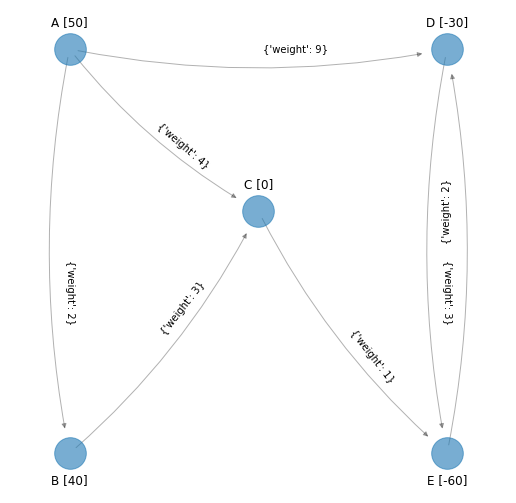

In [2]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', netflow = 50,  node_and_netflow="A [50]")
G_min_cost_flow.add_node('B', netflow = 40,  node_and_netflow="B [40]")
G_min_cost_flow.add_node('C', netflow = 0,   node_and_netflow="C [0]")
G_min_cost_flow.add_node('D', netflow = -30, node_and_netflow="D [-30]")
G_min_cost_flow.add_node('E', netflow = -60, node_and_netflow="E [-60]")

edge_labels_min_cost_flow = {('A', 'B'): {"weight": 2},
                             ('A', 'C'): {"weight": 4},
                             ('A', 'D'): {"weight": 9},
                             ('B', 'C'): {"weight": 3},
                             ('C', 'E'): {"weight": 1},
                             ('E', 'D'): {"weight": 2},
                             ('D', 'E'): {"weight": 3}
                            }


G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
        
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             edge_labels=edge_labels_min_cost_flow, label_pos=0.4,
                             font_size=10)
nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
labels = nx.get_node_attributes(G_min_cost_flow, "node_and_netflow")

nx.draw_networkx_labels(G_min_cost_flow, pos=nodes_and_pos_modified, 
                        labels=labels)
nx.draw_networkx_nodes(G_min_cost_flow, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

```{margin}

Obsérvese que es ligeramente distinta la nomenclatura de este problema en cuanto a los términos de flujo neto y demanda que tiene un nodo de acuerdo a lo que se describe en el {ref}`ejemplo de flujo de costo mínimo <EJREDFLUJOCOSTOMIN>`

```

Al lado de cada nodo en corchetes se presenta el flujo neto generado por el nodo. Los nodos origen tienen un flujo neto positivo y en la red son los nodos "A" y "B" (por ejemplo fábricas). Los nodos destino tienen un flujo neto negativo que en la red son los nodos "D" y "E" (por ejemplo clientes). El único nodo de transbordo es el nodo "C" que tiene flujo neto igual a cero (centro de distribución por ejemplo). Los valores de los costos se muestran en los arcos. Es una red sin capacidades.

Entonces el modelo de PL que minimiza el costo de transferencia de flujo de modo que el **flujo neto** satisfaga lo representado en la red, considerando el flujo neto como el flujo total que sale del nodo menos el flujo total que entra al nodo es:

$$\displaystyle \min_{x \in \mathbb{R}^7} 2 x_{AB} + 4 x_{AC} + 9 x_{AD} + 3 x_{BC} + x_{CE} + 3 x_{DE} + 2x_{ED}$$

$$\text{sujeto a: }$$

$$
\begin{eqnarray}
&x_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 50 \nonumber \\
&-x_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 40 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

$$x_{ij} \geq 0 \forall i,j$$

La primer restricción de igualdad representa el flujo neto para el nodo $A$ y la última el flujo neto para el nodo $E$. A tales ecuaciones de las restricciones de igualdad se les conoce con el nombre de **ecuaciones de conservación de flujo**.

```{admonition} Observación
:class: tip

Obsérvese que la matriz que representa a las restricciones de igualdad es la matriz de incidencia nodo-arco. Ver {ref}`Representación de redes: matriz de incidencia nodo-arco <MATINCIDNODOARCO>`

```

```{margin}

Multiplicamos por $-1$ pues el resultado de la función `incidence_matrix` está volteado respecto a la definición de la matriz de incidencia nodo-arco. 
```

In [3]:
print(-1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense())

[[ 1.  1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1. -1.  1.]]


El problema anterior lo podemos resolver directamente con [scipy-optimize-linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy-optimize-linprog) que es una función que resuelve PL's:

In [4]:
c = np.array([2, 4, 9, 3, 1, 3, 2])

A_eq = -1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense()

In [5]:
print(A_eq)

[[ 1.  1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1. -1.  1.]]


In [6]:
b = list(nx.get_node_attributes(G_min_cost_flow, 
                                "netflow").values())

```{margin}

Cada tupla hace referencia a las cotas inferiores y superiores que tiene cada variable.

```

In [7]:
bounds = [(0, None), (0,None), (0,None), (0,None), (0,None), (0, None), (0, None)]

In [8]:
print(linprog(c=c, A_eq=A_eq, b_eq=b,bounds=bounds))

     con: array([ 1.23415534e-06,  1.05034484e-06,  2.62587889e-08, -7.61500058e-07,
       -1.54925893e-06])
     fun: 469.9999898969424
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([3.62017054e-07, 4.99999977e+01, 7.19274437e-07, 3.99999993e+01,
       8.99999970e+01, 3.55827520e-09, 2.99999985e+01])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


```{margin}

Los *solvers* son paquetes de software para resolver modelos de programación lineal y modelos relacionados que se encuentran en los lenguajes de modelado.

```

```{margin}

Se instala [cvxopt](http://cvxopt.org/userguide/intro.html), un paquete de *Python* para resolver problemas de optimización convexa que ya trae el *solver* GLPK, ver [cvxpy: install-with-cvxopt-and-glpk-support](https://www.cvxpy.org/install/#install-with-cvxopt-and-glpk-support).

```

También con `cvxpy` podemos resolver el PL anterior. Para mostrar la flexibilidad que tienen los lenguajes de modelado como `cvxpy` se define $x$ como variable entera. `cvxpy` puede resolver este tipo de problemas si se instala el *solver* [GLPK](https://www.gnu.org/software/glpk/glpk.html)  :

In [9]:
!pip install --quiet cvxopt

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


```{margin}

Ver [cvxpy: linear_program](https://www.cvxpy.org/examples/basic/linear_program.html)

```

In [9]:
import cvxpy as cp

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [10]:
n = 7 #number of variables
x = cp.Variable(n, integer=True) #x as integer optimization variable
fo_cvxpy = c.T@x #objective function

constraints = [A_eq@x == b,
               x >=0
               ]

In [11]:
opt_objective = cp.Minimize(fo_cvxpy)

In [12]:
prob = cp.Problem(opt_objective, constraints)
print(prob.solve())

470.0


In [13]:
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)


The optimal value is 470.0
A solution x is
[ 0. 50.  0. 40. 90.  0. 30.]


(EJPROTOTIPO)=

## Ejemplo prototipo

Supóngase que una compañía tiene tres plantas en las que se producen dos productos. La compañía nos entrega los siguientes datos relacionados con:

1. Número de horas de producción disponibles por semana en cada planta para fabricar estos productos.

2. Número de horas de fabricación para producir cada lote de los productos.

3. La ganancia por lote de cada producto.

Lo anterior se resume en la siguiente tabla:

| |Tiempo de producción por lote en horas |||
|:---:|:---:|:---:|:---:|
| Planta |Producto 1|Producto 2| Tiempo de producción disponible a la semana en horas|
|1|1|0|4|
|2|0|2|12|
|3|3|2|18|
|Ganancia por lote| 3000| 5000||

La tabla anterior indica en su primer renglón que cada lote del producto 1 que se produce por semana emplea una hora de producción en la planta 1 y sólo se dispone de 4 horas semanales (**recursos disponibles**). Como se lee en la tabla, cada producto se fabrica en lotes de modo que la tasa de producción está definida como el número de lotes que se producen a la semana. 

Obsérvese que el producto 1 requiere parte de la capacidad de producción en las plantas 1, 3 y nada en la planta 2. El producto 2 necesita trabajo en las plantas 2 y 3. Por lo anterior no está claro cuál **mezcla de productos** sería la más rentable.

Se permite cualquier combinación de tasas de producción que satisfaga estas restricciones, incluso no fabricar uno de los productos y elaborar todo lo que sea posible del otro. La tasa de producción está definida como el número de lotes que se producen a la semana.
 
Se desea determinar cuáles tasas de producción (no negativas) deben tener los dos productos con el fin de maximizar las **ganancias** totales sujetas a las restricciones impuestas por las capacidades de producción limitadas disponibles en las tres plantas.

Se asume que las plantas únicamente destinan su producción a estos dos productos y la ganancia incremental de cada lote adicional producido es constante sin importar el número total de lotes producidos. La ganancia total de cada producto es aproximadamente la ganancia por lote que se produce multiplicada por el número de lotes.

Se modela el problema anterior como un PL con las siguientes variables:

$x_1$: número de lotes del producto 1 que se fabrican por semana.

$x_2$: número de lotes del producto 2 que se fabrican por semana.

$f_o(x_1, x_2)$: ganancia semanal total (en miles de pesos) que generan estos dos productos.

Se debe resolver el PL siguiente:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

El término $3x_1$ representa la ganancia generada (en miles de pesos) cuando se fabrica el producto 1 a una tasa de $x_1$ lotes por semana. Se tienen contribuciones individuales de cada producto a la ganancia.

## Modelo de PL

Algunas características generales de los problemas de PL se presentan a continuación

### Terminología en PL

|Ejemplo prototipo | Problema general|
|:---:|:---:|
|Capacidad  producción de las plantas | Recursos|
|3 plantas | m recursos |
|Fabricación de productos | Actividades |
|2 productos | n actividades|
|Tasa de producción del producto | Nivel de la actividad|
|Ganancia | Medida global de desempeño|

Y en la terminología del problema general se desea determinar la asignación de recursos a ciertas actividades. Lo anterior implica elegir los niveles de las actividades (puntos óptimos) que lograrán el mejor valor posible (valor óptimo) de la medida global de desempeño.

En el PL:

$f_o$: valor de la medida global de desempeño (función objetivo).

$x_j$: nivel de la actividad $j$ con $j=1, 2, \dots, n$. También se les conoce con el nombre de variables de decisión (variables de optimización).

$c_j$: incremento en $f_o$ que se obtiene al aumentar una unidad en el nivel de la actividad j.

$b_i$: cantidad de recurso $i$ disponible para asignarse a las actividades con $i=1, 2, \dots, m$.

$a_{ij}$: cantidad del recurso $i$ consumido por cada unidad de la actividad $j$.

```{admonition} Observación
:class: tip

Los valores de $c_j, b_i, a_{ij}$ son las constantes o parámetros del modelo.

```

### Formas de un PL

Es posible que se encuentren con PL en diferentes formas por ejemplo:

1.Minimizar en lugar de maximizar la función objetivo.

2.Restricciones con desigualdad en sentido mayor, menor o igual que.

3.Restricciones en forma de igualdad.

4.Variables de decisión sin la restricción de no negatividad (variables libres).

Pero siempre que se cumpla con que la función objetivo y las restricciones son funciones lineales entonces tal problema se clasifica como un PL.

```{admonition} Observación
:class: tip


Si se utiliza un PL con otras formas diferentes a la del ejemplo prototipo (por ejemplo variables libres en lugar de no negativas) es posible que la interpretación de "asignación de recursos limitados entre actividades que compiten" puede ya no aplicarse muy bien; pero sin importar cuál sea la interpretación o el contexto, lo único necesario es que la formulación matemática del problema se ajuste a las formas permitidas.

```

(EJMETGRAFICOPL)=

## Ejemplo: método gráfico

A continuación se muestra un procedimiento gráfico para resolver el PL del ejemplo prototipo. Esto es posible realizar pues tenemos sólo dos variables. Se tomará $x_1$ como el eje horizontal y $x_2$ el eje vertical. 

Recordando las variables del ejemplo prototipo:

$x_1$: número de lotes del producto 1 que se fabrican por semana.

$x_2$: número de lotes del producto 2 que se fabrican por semana.

$f_o(x_1, x_2)$: ganancia semanal total (en miles de pesos) que generan estos dos productos.

Y el PL es:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

Entonces se tiene la siguiente región definida por las desigualdades del PL:

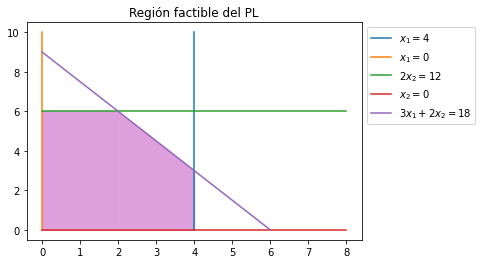

In [14]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


La región sombreada es la región factible. Cualquier punto que se elija en la región factible satisface las desigualdades definidas en el PL. Ahora tenemos que seleccionar dentro de la región factible el punto que maximiza el valor de la función objetivo $f_o$.

El procedimiento gráfico consiste en dar a $f_o$ algún valor arbitrario, dibujar la recta definida por tal valor  y "mover tal recta de forma paralela" en la dirección que $f_o$ crece (si se desea maximizar y en la dirección en la que $f_o$ decrece si se desea minimizar) hasta que se mantenga en la región factible.

Para la función objetivo del PL anterior queda como sigue:

$$y = f_o(x) = 3x_1 + 5x_2$$

y vamos dando valores arbitrarios a $y$:

```{margin}

Todas las rectas tienen la misma pendiente por lo que son paralelas. Cada una de las rectas son las curvas de nivel de $f_o$

```

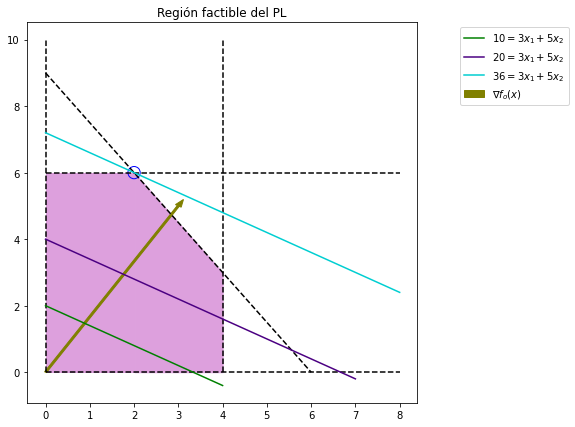

In [15]:
plt.figure(figsize=(7,7))
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], "--", color="black", label = "_nolegend_")
plt.plot(x_1, x_2, "--", color="black", label="_nolegend_")

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")

x_1_line_1 = np.linspace(0, 4, 100)

x_2_line_1 = 1/5*(-3*x_1_line_1 + 10)

x_1_line_2 = np.linspace(0, 7, 100)

x_2_line_2 = 1/5*(-3*x_1_line_2 + 20)

x_1_line_3 = np.linspace(0, 8, 100)

x_2_line_3 = 1/5*(-3*x_1_line_3 + 36)

plt.plot(x_1_line_1, x_2_line_1, "green",
         x_1_line_2, x_2_line_2, "indigo",
         x_1_line_3, x_2_line_3, "darkturquoise"
         )


optimal_point = (2, 6)

plt.scatter(optimal_point[0], optimal_point[1], marker='o', s=150,
            facecolors='none', edgecolors='b')

point_origin = (0, 0)

point_gradient_fo = (3, 5)


points_for_gradient_fo = np.row_stack((point_origin,
                                       point_gradient_fo))


plt.arrow(point_origin[0], point_origin[1],
          point_gradient_fo[0], point_gradient_fo[1],
          width=.05, color="olive")

plt.legend(["$10 = 3x_1 + 5x_2$",
            "$20 = 3x_1 + 5x_2$",
            "$36 = 3x_1 + 5x_2$",
            "$\\nabla f_o(x)$"], bbox_to_anchor=(1.4, 1))

plt.show()


Si realizamos este proceso para valores de $y$ iguales a $36, 20, 10$ observamos que la recta que da el mayor valor de la $f_o$ y que se mantiene en la región factible es aquella con valor $y_1= f_o(x) = 36$. Corresponde a la pareja $(x_1, x_2) = (2, 6)$ y es la **solución óptima**. Entonces produciendo los productos $1$ y $2$ a una tasa de $2$ y $6$ lotes por semana se maximiza la ganancia siendo de 36 mil pesos. No existen otras tasas de producción que sean tan redituables como la anterior de acuerdo con el modelo.

```{admonition} Comentarios

* El método gráfico anterior sólo funciona para dos o tres dimensiones.

* El gradiente de la función objetivo nos indica la dirección de máximo crecimiento de $f_o$. En el ejemplo prototipo $\nabla f_o(x) = \left [ \begin{array}{c} 3 \\ 5 \end{array} \right ]$ y tal vector apunta hacia la derecha y hacia arriba. Entonces en esa dirección es hacia donde desplazamos las rectas paralelas.

* La región factible que resultó en el ejemplo prototipo se le conoce con el nombre de poliedro y es un conjunto convexo (en dos dimensiones se le nombra polígono). Es una intersección finita entre hiperplanos y semi espacios, también puede pensarse como el conjunto solución de un número finito de ecuaciones y desigualdades lineales.

```


```{admonition} Ejercicio
:class: tip

Resuelve con el método gráfico el siguiente PL:

$$\displaystyle \max_{x \in \mathbb{R}^2} 2x_1 + x_2$$

$$\text{sujeto a: }$$

$$x_2 \leq 10$$

$$2x_1 + 5x_2 \leq 60$$

$$x_1 + x_2 \leq 18$$

$$3x_1 + x_2 \leq 44$$

$$x_1 \geq 0, x_2 \geq 0$$

Marca al gradiente de la función objetivo en la gráfica.
```

## Tipo de soluciones en un PL

Los puntos factibles que resultan de la intersección entre las rectas del ejemplo prototipo que corresponden a las desigualdades se les nombra **soluciones factibles en un vértice (FEV)** (se encuentran en una esquina). Las soluciones FEV **no** son una combinación convexa estricta entre puntos distintos del poliedro formado en la región factible (no caen en algún segmento de línea formado por dos puntos distintos).

```{admonition} Observación
:class: tip

También a las soluciones FEV se les conoce como **puntos extremos** pero resulta más sencillo recordar FEV.

```

```{admonition} Comentario

El método gráfico en la región anterior ilustra una **propiedad importante** de los PL con soluciones factibles y una región acotada: siempre tiene soluciones FEV y al menos una solución óptima, aún más, la mejor solución en un FEV debe ser una solución óptima.

```

###  ¿A qué le llamamos solución en un PL?

Cualquier conjunto de valores de las variables de decisión ($x_1, x_2, \dots, x_n$) se le nombra una solución y se identifican dos tipos:

* Una solución factible es aquella para la cual todas las restricciones se satisfacen.

* Una solución no factible es aquella para la cual al menos una restricción no se satisface.

En el ejemplo prototipo los puntos $(2,3)$ y $(4,1)$ son soluciones factibles y $(-1, 3), (4,4)$ son soluciones no factibles.

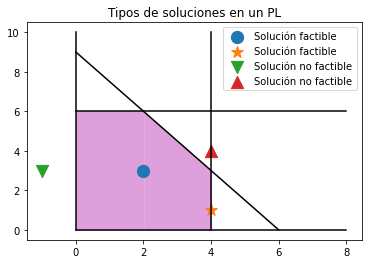

In [17]:
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], "black", label = "_nolegend_")
plt.plot(x_1, x_2, "black", label = "_nolegend_")


plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
plt.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

plt.scatter(2, 3, marker='o', s=150)
plt.scatter(4, 1, marker='*', s=150)
plt.scatter(-1, 3, marker='v', s=150)
plt.scatter(4, 4, marker='^', s=150)

plt.legend(["Solución factible", "Solución factible",
            "Solución no factible", "Solución no factible"])

plt.title("Tipos de soluciones en un PL")
plt.show()

```{margin}

"Valor más favorable de la función objetivo" depende si se tiene un problema de maximización o minimización.

```

De las soluciones factibles se busca aquella solución óptima (puede haber más de una) que nos dé el valor "más favorable" (valor óptimo) de la función objetivo.

### Ejemplo: más de una solución óptima

Es posible tener más de una solución óptima, por ejemplo si la función objetivo hubiera sido $f_o(x) = 3x_1 + 2x_2$ entonces:

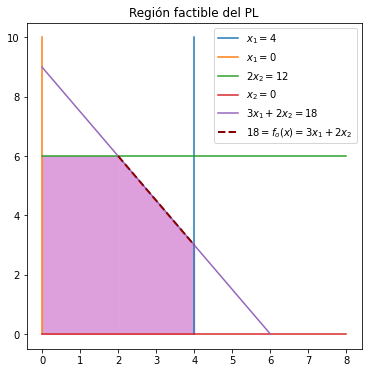

In [18]:
plt.figure(figsize=(6,6))
point4 = (2, 6)
point5 = (4, 3)

point4_point5 = np.row_stack((point4, point5))

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")

plt.plot(point4_point5[:,0], point4_point5[:,1], 
         linewidth=2, color = "darkred", linestyle='dashed')

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$",
            "$18 = f_o(x) = 3x_1 + 2x_2$"], bbox_to_anchor=(1, 1))
plt.title("Región factible del PL")
plt.show()

El segmento de recta que va de $(2,6)$ a $(4,3)$ (en línea punteada) son soluciones óptimas. Tal segmento es la curva de nivel de $f_o(x)$ con el valor $18$. Cualquier PL que tenga soluciones óptimas múltiples tendrá un número infinito de ellas, todas con el mismo valor óptimo.

```{admonition} Comentario

Si un PL tiene exactamente una solución óptima, ésta debe ser una solución FEV. Si tiene múltiples soluciones óptimas, al menos dos deben ser soluciones FEV. Por esto para resolver problemas de PL sólo tenemos que considerar un número finito de soluciones.


```

### Ejemplo: PL's sin solución

Es posible que el PL no tenga soluciones óptimas lo cual ocurre sólo si:

1. No tiene soluciones factibles y se le nombra PL **no factible**.

2. Las restricciones no impiden que el valor de la función objetivo mejore indefinidamente en la dirección favorable. En este caso se tiene un PL con función objetivo no acotada y se le nombra PL **no acotado**.


Un ejemplo de un PL no factible pues su región factible es vacía se obtiene al añadir la restricción $3x_1+ 5x_2 \geq 50$ a las restricciones anteriores:

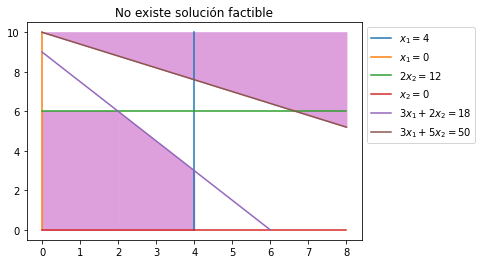

In [19]:
#3x_1 + 5x_2 ≥ 50

x_1_b = np.linspace(0,8, 100)

x_2_b = 1/5*(50 - 3*x_1_b)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2,
         x_1_b, x_2_b)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$",
            "$3x_1 + 5x_2 = 50$"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_b, x_2_b, 10, color="plum")
plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("No existe solución factible")
plt.show()

La intersección entre las dos regiones sombreadas es vacía.

Un ejemplo de un PL no acotado resulta de sólo considerar las restricciones $x_1 \leq 4, x_1 \geq 0, x_2 \geq 0$:

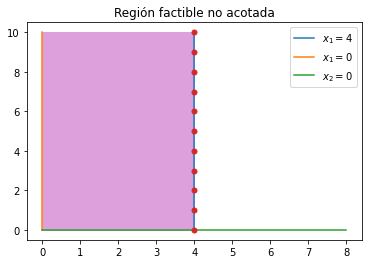

In [20]:
points = np.column_stack((4*np.ones(11), np.arange(11)))
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1])

plt.plot(points[:,0], points[:,1], 'o', markersize=5)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$x_2 = 0$"], bbox_to_anchor=(1, 1))


x_1_region = np.linspace(0,4, 100)
plt.fill_between(x_1_region, 0, 10, color="plum")
plt.title("Región factible no acotada")
plt.show()


Se observa en la gráfica anterior que se tiene una región factible no acotada y como el objetivo es maximizar podemos elegir el valor $x_1 = 4$ y arbitrariamente un valor cada vez más grande de $x_2$ y obtendremos una mejor solución dentro de la región factible.

```{sidebar} Un poco de historia ...

El [método símplex](https://en.wikipedia.org/wiki/Simplex_algorithm) pertenece a una clase general de algoritmos de optimización con restricciones conocida como [métodos de conjuntos activos](https://en.wikipedia.org/wiki/Active-set_method) en los que la tarea fundamental es determinar cuáles restricciones son activas y cuáles inactivas en la solución. Mantiene estimaciones de conjuntos de índices de restricciones activas e inactivas que son actualizadas y realiza cambios modestos a tales conjuntos en cada paso del algoritmo.

```

(METODOSIMPLEX)=

## Método símplex

Para comprender sus conceptos fundamentales se considera un PL en una forma **no estándar** y se utiliza el mismo PL del ejemplo prototipo:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

(SOLFEVNFEV)=

### Soluciones FEV y NFEV

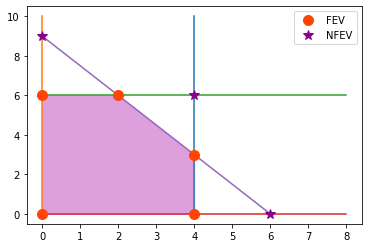

In [21]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")


ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")


point_FEV_1 = (0,0)
point_FEV_2 = (0,6)  
point_FEV_3 = (2,6) 
point_FEV_4 = (4,3) 
point_FEV_5 = (4,0)


array_FEV = np.row_stack((point_FEV_1,
                          point_FEV_2,
                          point_FEV_3,
                          point_FEV_4,
                          point_FEV_5))

point_NFEV_1 = (0, 9)
point_NFEV_2 = (4, 6)
point_NFEV_3 = (6, 0)

array_NFEV = np.row_stack((point_NFEV_1,
                           point_NFEV_2,
                           point_NFEV_3))


ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

Los puntos en la gráfica con etiqueta "FEV" son soluciones factibles en un vértice:

* $(0, 0), (0, 6), (2, 6), (4, 3), (4, 0)$


y están definidos por las restricciones de desigualdad tomando sólo la igualdad, esto es, por las rectas: $x_1 = 4, 2x_2 = 12, 3x_1 + 2 x_2 = 18, x_1 = 0, x_2 = 0$. 

```{admonition} Definiciones

* A las rectas que se forman a partir de una desigualdad tomando únicamente la igualdad se les nombra **ecuaciones de frontera de restricción** o sólo ecuaciones de frontera.

* Las ecuaciones de frontera que definen a las FEV se les nombra **ecuaciones de definición**.

```

Análogamente los puntos con etiqueta "NFEV" son soluciones no factibles en un vértice:


* $(0, 9), (4, 6), (6,0)$

y también están definidos por las ecuaciones de frontera.

```{admonition} Observación
:class: tip

Aunque las soluciones en un vértice también pueden ser no factibles (NFEV) el método símplex no las revisa.

```

```{margin}

En más de dos dimensiones cada ecuación de definición genera un hiperplano en un espacio $n$ dimensional. Y la intersección de las $n$ ecuaciones de frontera es una solución simultánea de un sistema de $n$ ecuaciones lineales de definición.

```

```{admonition} Comentarios

* En general para un PL con $n$ variables de decisión se cumple que cada solución FEV se define por la intersección de $n$ ecuaciones de frontera. Podría ser que se tengan más de $n$ fronteras de restricción que pasen por el vértice pero $n$ de ellas definen a la solución FEV y éstas son las ecuaciones de definición.

* Cada solución FEV es la solución simultánea de $n$ ecuaciones elegidas entre $m + n$ restricciones. El número de combinaciones de las $m + n$ ecuaciones tomadas $n$ a la vez es la **cota superior** del número de soluciones FEV. Para el ejemplo prototipo $m = 3, n=2$ por lo que $C^{m+n}_n = C^5_2 = 10$ y **sólo** $5$ conducen a soluciones FEV.

```

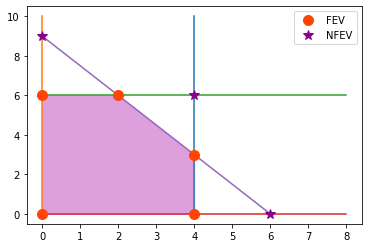

In [22]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

|Solución FEV| Ecuaciones de definición|
|:---:|:---:|
|(0,0)| $x_1 = 0, x_2 = 0$|
|(0,6)| $x_1 = 0, 2x_2 = 12$|
|(2,6)| $2x_2 = 12, 3x_1 + 2x_2 = 18$|
|(4,3)| $3x_1 + 2x_2 = 18, x_1 = 4$|
|(4,0)| $x_1 = 4, x_2 = 0$|

### FEV adyacentes

```{admonition} Definición

En un PL con $n$ variables de decisión nombramos soluciones FEV adyacentes a dos soluciones FEV que comparten $n-1$ fronteras de restricción. Las soluciones FEV adyacentes están conectadas por una arista (segmento de recta)
```

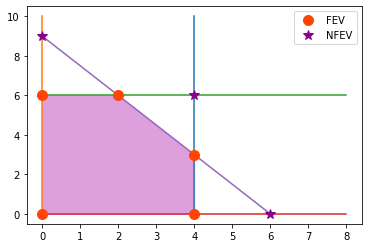

In [23]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

En el ejemplo prototipo $(0,0)$ y $(0,6)$ son adyacentes pues comparten una arista formada por la ecuación de frontera $x_1=0$ y de cada solución FEV salen dos aristas, esto es tienen dos soluciones FEV adyacentes.

```{admonition} Comentario

Una razón para analizar las soluciones FEV adyacentes es la siguiente **propiedad**: 

si un PL tiene al menos una solución óptima y una solución FEV no tiene soluciones FEV adyacentes que sean mejores entonces ésa debe ser una solución óptima.

```

```{admonition} Observación
:class: tip

En el ejemplo prototipo $(2, 6)$ es un punto óptimo pues sus soluciones FEV adyacentes, $(0, 6)$, $(4,3)$ tienen un valor de la función objetivo menor (recuérdese es un problema de maximización).

```

### Pasos que sigue el método símplex

Para el ejemplo prototipo el método símplex a grandes rasgos realiza lo siguiente:

**Paso inicial:** se elige $(0,0)$ como la solución FEV inicial para examinarla (esto siempre se puede hacer para problemas con restricciones de no negatividad).

```{margin}

En el ejemplo numérico se entenderá la frase "solución FEV adyacente que es mejor"

```

**Prueba de optimalidad:** revisar condición de optimalidad para $(0,0)$. Concluir que $(0,0)$ no es una solución óptima (existe una solución FEV adyacente que es mejor).

**Iteración 1:** moverse a una solución FEV adyacente mejor, para esto se realizan los pasos:


1.Entre las dos aristas de la región factible que salen de $(0,0)$ se elige desplazarse **a lo largo** de la arista que aumenta el valor de $x_2$ (con una función objetivo $f_o(x) = 3x_1 + 5x_2$ si $x_2$ aumenta entonces el valor de $f_o$ crece más que con $x_1$).

2.Detenerse al llegar a la primera ecuación de frontera en esa dirección: $2x_2 = 12$ para **mantener factibilidad**.

3.Obtener la intersección del nuevo conjunto de ecuaciones de frontera: $(0,6)$.

```{margin}

En el ejemplo numérico se entenderá la frase "solución FEV adyacente que es mejor"

```

**Prueba de optimalidad**: revisar condición de optimalidad para $(0,6)$. Concluir que $(0,6)$ no es una solución óptima (existe una solución FEV adyacente que es mejor).

**Iteración 2:** moverse a una solución FEV adyacente mejor:


1.De las dos aristas que salen de $(0,6)$ moverse a lo largo de la arista que aumenta el valor de $x_1$ (para que la $f_o$ continue mejorando no podemos ir hacia abajo pues esto implicaría disminuir el valor de $x_2$ y por tanto $f_o$).

2.Detenerse al llegar a la primera ecuación de frontera en esa dirección: $3x_1+2x_2 = 12$ para manterner factibilidad.

3.Obtener la intersección del nuevo conjunto de ecuaciones de frontera: $(2,6)$.

```{margin}

En el ejemplo numérico se entenderá la frase "ninguna solución FEV adyacente es mejor"
```

**Prueba de optimalidad:** revisar condición de optimalidad para $(2,6)$. Concluir que $(2,6)$ es una solución óptima (ninguna solución FEV adyacente es mejor).

(FORMAAUMENTADAPL)=

### Forma aumentada de un PL

El método símplex inicia con un **sistema de ecuaciones lineales** con lado derecho **igual** a $b$ (que es el lado derecho de las restricciones funcionales) y una matriz del sistema con menos renglones que columnas. **Asume** que las entradas de $b$ son no negativas y que el *rank* de $A$ es completo.

Para revisar los pasos del método símplex descritos anteriormente en esta sección continuaremos con el ejemplo prototipo de PL:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

Y vamos a nombrar a las desigualdades $x_1 \leq4, 2x_2 \leq 12, 3x_1 + 2x_2 \leq 18$ **restricciones funcionales** y a las desigualdades $x_1 \geq 0, x_2 \geq 0$ **restricciones de no negatividad**.

```{admonition} Observación
:class: tip

Aunque hay diversas formas de PL en las que podríamos tener lados derechos negativos o desigualdades del tipo $\geq$, es sencillo transformar de forma algebraica tales PL a una forma similar descrita en esta sección. 

```

En el ejemplo prototipo tenemos desigualdades por lo que se introducen **variables de holgura, *slack variables*,** no negativas para obtener la **forma aumentada**:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 + x_3 = 4$$

$$2x_2 + x_4 = 12$$

$$3x_1 + 2x_2 + x_5 = 18$$

$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0$$

```{margin}

Forma estándar de un PL:

$$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$$

```

```{admonition} Comentarios

* La forma aumentada que se obtuvo para **el ejemplo prototipo** **no** es la forma estándar de un PL salvo porque en la estándar se usa una minimización, ver {ref}`forma estándar de un PL <FORMAESTPL>`. Sin embargo, la forma estándar del PL se puede obtener considerando que maximizar $3x_1 + 5x_2$ sujeto a las restricciones dadas tiene mismo conjunto óptimo al problema minimizar $-3x_1 - 5 x_2$ sujeto a las mismas restricciones (los valores óptimos entre el problema de maximización y minimización son iguales salvo una multiplicación por $-1$).

* Las variables de holgura al iniciar el método tienen un coeficiente de $0$ en la función objetivo $f_o(x) = 3x_1 + 5x_2 = 3x_1 + 5x_2  + 0x_3 + 0x_4 + 0x_5$

```

Y en notación matricial el sistema de ecuaciones lineales es:

$$
Ax = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
=
b
$$

```{admonition} Observación
:class: tip

Obsérvese que en la matriz de la forma aumentada se tiene una matriz identidad.

```

```{admonition} Comentario

Interpretación de algunos valores de las variables en la forma aumentada:

Si una variable de holgura es igual a $0$ en la solución actual, entonces esta solución se encuentra sobre la ecuación de frontera de la restricción funcional correspondiente. Un valor mayor que $0$ significa que la solución está en el lado factible de la ecuación de frontera, mientras que un valor menor que $0$ señala que está en el lado no factible de esta ecuación de frontera.

```

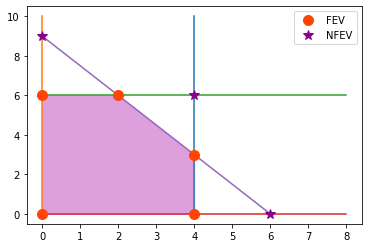

In [24]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

```{admonition} Definiciones

Una **solución aumentada** es una solución de las variables originales que se aumentó con los valores correspondientes de las variables de holgura.

Una **solución básica** es una solución FEV o NFEV aumentada.

Una **solución básica factible (BF)** es una solución FEV aumentada.

```

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo prototipo:

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] = \left [ \begin{array}{c} 3 \\ 2 \end{array} \right ]$ es solución (de hecho factible) y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 3 \\ 2 \\ 1 \\ 8 \\ 5 \end{array} \right ]$ es solución aumentada (factible).

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] =  \left [ \begin{array}{c} 4 \\ 6 \end{array} \right ]$ es solución NFEV y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 0 \\ 0 \\ -6 \end{array} \right ]$ es solución básica.

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] =  \left [ \begin{array}{c} 0 \\ 6 \end{array} \right ]$ es solución FEV y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ es solución BF.

### Soluciones BF adyacentes

```{admonition} Definición

Dos soluciones BF son adyacentes si sus correspondientes soluciones FEV lo son. 

```

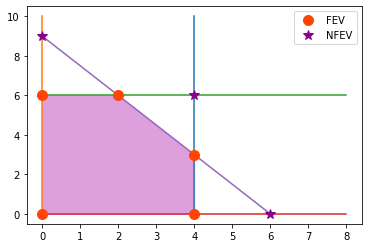

In [25]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo prototipo $\left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right ]$ y $\left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ son soluciones BF adyacentes. 

(VARBASICASNOBASICAS)=

### Variables básicas y no básicas

```{admonition} Definición

Dada la matriz $A \in \mathbb{R}^{m \times n}$ de la forma aumentada aquellas variables de decisión que corresponden a columnas linealmente independientes se les nombra **variables básicas**. Las restantes son **variables no básicas**.

```

Al inicio del método símplex la matriz de la forma aumentada es:

$$\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$$

Por lo que las variables básicas son $x_3, x_4, x_5$ y las no básicas son $x_1, x_2$.

```{admonition} Definición

La matriz que se forma a partir de las columnas de $A$ que corresponden a las variables básicas se denota como $B \in \mathbb{R}^{m \times m}$ es no singular y se nombra ***basis matrix***. La matriz que se forma con las columnas de las variables no básicas se denota con $N$ y su nombre es ***nonbasis matrix***.

```

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo prototipo la *basis matrix* y la *nonbasis matrix* al inicio del método son:

$$B
=\left [
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right ]
$$

$$N
=
\left [
\begin{array}{ccccc}
1 & 0 \\
0 & 2 \\
3 & 2 \\
\end{array}
\right ]
$$

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


```{admonition} Comentarios

* Obsérvese en el ejemplo prototipo que al tener 5 variables y tres ecuaciones si se le asigna un valor arbitrario a $x_1, x_2$ entonces quedan determinadas las variables $x_3, x_4, x_5$. En el método símplex las variables no básicas se igualan a $0$ por lo que se tiene: $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5\end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right ]$

* Una forma de distinguir si dos soluciones BF son adyacentes es comparar qué variables no básicas (análogamente sus básicas) tienen. Si difieren en sólo una entonces son soluciones BF adyacentes. Por ejemplo: $\left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right]$ y $\left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ son BF adyacentes pues tienen como variables no básicas $x_1, x_2$ y $x_1, x_4$ respectivamente. Esto también se puede describir como: $x_2$ "pasa de ser no básica a básica" (análogamente $x_4$ pasa de básica a no básica). Lo anterior ayuda a identificar soluciones BF adyacentes en PL's con más de dos variables en los que resulta más complicado graficar.

* El método símplex al considerar variables no básicas con valor de $0$ indica que la restricción no negativa $x_j \geq 0$ es **activa** para $j$ en los índices de las variables no básicas.

* En el método símplex se puede verificar que una solución es BF si las variables básicas son no negativas (recuérdese que las no básicas en el método son igualadas a cero).

```

### Variables básicas no degeneradas y degeneradas

Considerando un problema con $n$ variables al que se le añadieron $m$ variables de holgura denotemos a $\mathcal{B}$ como el conjunto de índices en el conjunto $\{1, 2, \dots, m+n\}$ que representan a las variables básicas y $\mathcal{N}$ al conjunto de índices de las no básicas. 

El ejemplo prototipo en su forma aumentada $\mathcal{B} = \{3, 4, 5\}$, $\mathcal{N} = \{1, 2\}$ con $m=3, n=2, m+n=5$. El método símplex en sus iteraciones elige algún índice de $\mathcal{N}$ y lo sustituye por un índice del conjunto $\mathcal{B}$.

```{margin}

En el ejemplo numérico se entenderá la frase "mejoren la función objetivo $f_o$".
```

```{admonition} Comentarios

* El quitar y añadir variables a los conjuntos de índices $\mathcal{N}, \mathcal{B}$ y realizar los ajustes necesarios (recalcular valores de las variables básicas) en los valores de todas las variables básicas y no básicas se le conoce con el nombre de **pivoteo**.

* La interpretación geométrica de quitar, añadir variables de las matrices $N, B$ y realizar los ajustes necesarios (recalcular valores de las variables básicas) en una solución BF es equivalente en dos dimensiones a moverse por una arista y detenerse hasta encontrar una solución FEV.

* La elección de cuál variable no básica sustituir por una variable básica depende de la existencia de soluciones BF que mejoren la función objetivo $f_o$ y para ello se utiliza un **criterio de optimalidad**.

```

En el método símplex al recalcular los valores de las variables básicas algunas pueden tener valor igual a cero lo que da lugar a la siguiente definición.

```{admonition} Definición

Una solución BF para un PL con restricciones de no negatividad en la que todas sus variables básicas son positivas se nombra no degenerada y degenerada si existe al menos una con valor igual a cero.

```

(EJMETSIMPLEXAPLICADOEJPROTOTIPO)=

## Ejemplo del método símplex aplicado al ejemplo prototipo

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


Continuemos con el ejemplo prototipo en su forma aumentada. En notación matricial el sistema de ecuaciones lineales es:

$$
Ax = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
=
b
$$

Defínanse al vector $x$ que contiene las variables "originales" y a las de holgura: $x = \left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ]$ y $c = \left [ \begin{array}{c} -3 \\ -5 \\ 0 \\ 0 \\ 0 \end{array}\right]$ al vector de costos unitarios o equivalentemente $-c$ el vector de ganancias unitarias. Así, la función objetivo es: $f_o(x) = (-c)^Tx$ y se busca maximizar la ganancia total. También defínanse a los vectores de variables básicas y no básicas como: $x_B = [x_j]_{j \in \mathcal{B}}$, $x_N = [x_j]_{j \in \mathcal{N}}$.

```{margin}

Siendo rigurosos la forma estándar de un PL es:

$$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$$

por lo que aunque maximizar $(-c)^Tx$ sujeto a las restricciones dadas tiene el mismo conjunto óptimo que el problema de minimizar $c^Tx$ sujeto a las mismas restricciones (los valores óptimos entre el problema de maximización y minimización son iguales salvo una multiplicación por $-1$), el problema debe escribirse explícitamente como minimización para considerarse en forma estándar.

```

Entonces el PL con esta notación que se debe resolver es:

$$\displaystyle \max_{x \in \mathbb{R}^5} (-c)^Tx$$

$$\text{sujeto a: }$$

$$Ax = b$$

$$x \geq 0$$

con $x=\left [ \begin{array}{c} x_B \\ x_N\end{array} \right ] \in \mathbb{R}^5$, $x_B \in \mathbb{R}^{3}, x_N \in \mathbb{R}^2$, $A \in \mathbb{R}^{3 \times 5}$.


### Paso inicial del ejemplo prototipo

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


Se tiene la siguiente situación: 

$$(-c)^Tx= 3x_1 + 5x_2 + 0x_3 + 0x_4 + 0x_5$$


$$
A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$$

Como $A = [ N \quad B ]$, $x=\left [ \begin{array}{c} x_N \\ x_B\end{array} \right ]$ y $Ax = b$ entonces $Ax = B x_B + N x_N = b$. 


Se designa $x_N$ como un vector de ceros:

$$x_N = \left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \end{array} \right ]$$

Por tanto:

$$Ax = Bx_B + N x_N = B x_B = b$$

y se tiene:

$$x_B = B^{-1}b.$$

En este paso inicial **para el ejemplo prototipo** $x_B = b$ pues $B$ es la identidad:

$$\therefore x_B = \left [ \begin{array}{c} x_3 \\ x_4 \\ x_5\end{array}\right ] = B^{-1}b = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]^{-1} \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]=\left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]$$

El vector de costos $c$ lo dividimos en $c = \left [ \begin{array}{c} c_N\\ c_B \end{array} \right ]$, con  $c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_4} \\ c_{B_5} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right ]$ contiene los costos de las variables básicas. El vector $c_N=\left [ \begin{array}{c} c_{N_1} \\ c_{N_2} \end{array} \right ]=\left [ \begin{array}{c}-3 \\ -5 \end{array} \right ]$ contiene los costos de las variables no básicas.

Las variables básicas son $x_3, x_4, x_5$ y las no básicas son $x_1, x_2$.

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


```{admonition} Comentario

La solución BF en el paso inicial $x = \left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right ]$ tiene como variables no básicas $x_1, x_2$ e indican que las restricciones $x_1 \geq 0, x_2 \geq 0$ son restricciones activas.

```

In [26]:
B = np.eye(3)
b = np.array([4, 12, 18])
x_B = b
A = np.array([[1, 0, 1, 0, 0],
              [0, 2, 0, 1, 0],
              [3, 2, 0, 0, 1]])
c_B = np.array([0,0,0])
c_N = np.array([-3, -5])

#list of indexes of nonbasic variables correspond to x1, x2
N_list_idx = [0, 1]
#list of indexes of basic variables correspond to x3, x4, x5
B_list_idx = [2, 3, 4] 


### Prueba de optimalidad

Para revisar tanto en el paso inicial como en las iteraciones posteriores la condición de optimalidad para encontrar soluciones FEV adyacentes mejores, realicemos algunas reescrituras de la función objetivo.

1.Obsérvese que la función objetivo se puede escribir como:

```{margin}

Recuérdese que la función objetivo es: $(-c)^Tx= 3x_1 + 5x_2 + 0x_3 + 0x_4 + 0x_5$.

```

$$f_o(x) = (-c)^Tx = [-c_B \quad -c_N] ^T \left [ \begin{array}{c} x_B \\ x_N\end{array} \right ] = -c_B^Tx_B - c_N^T x_N = -c_B^T B^{-1}b = [0 \quad 0 \quad 0]^T \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]=0$$

2.Obsérvese que las restricciones en su forma igualadas a cero pueden ser restadas de la función objetivo sin modificar su valor. Por ejemplo si tomamos la primer restricción con lado derecho igual a cero: $x_1 + x_3 - 4 = 0$ entonces:

$$f_o(x) = f_o(x) - 0 =  f_o(x) -  (x_1 + x_3 - 4) = f_o(x) -x_1 -x_3 + 4$$

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


Y esto podemos hacer para todas las restricciones con lado derecho igual a cero:

$$
\begin{eqnarray}
f_o(x) &=& f_o(x) -  (x_1 + x_3 - 4) - (2x_2 + x_4 - 12) - (3x_1 + 2x_2 + x_5 - 18) \nonumber \\
&=& f_o(x) + (-4x_1 - 4x_2) + (-x_3 - x_4 - x_5) + (4 + 12 + 18) \nonumber \\
&=& f_o(x) - 4 \displaystyle \sum_{j \in \mathcal{B}} x_{B_j} - \sum_{j \in \mathcal{N}}x_{N_j} + \sum_{i = 1}^3 b(i)
\end{eqnarray}
$$

con $x_{B_j}$ $j$-ésima componente del vector $x_B$, $x_{N_j}$ $j$-ésima componente del vector $x_N$ y $b(i)$ $i$-ésima componente de $b$.

```{margin}

No es coincidencia que se elijan las cantidades $\lambda, \nu$ para representar esta igualdad, ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`.

```

En el método símplex no solamente se restan de la $f_o$ las restricciones con lado derecho igual a cero sino se multiplican por una cantidad $\nu_i$ y se suman a $f_o$. También si $\lambda$ es un vector tal que $\lambda ^T x = 0$ entonces:

$$f_o(x) = f_o(x) + \lambda^Tx + \sum_{i = 1}^3 \nu_i h_i(x) = f_o(x) + \displaystyle \sum_{j \in \mathcal{B}} \lambda_{B_j} x_{B_j} + \sum_{j \in \mathcal{N}}\lambda_{N_j}x_{N_j} + \sum_{i = 1}^3 \nu_i h_i(x)$$


con $\lambda_{B_j}$, $\lambda_{N_j}$ coeficientes asociados a $x_{B_j}$ y $x_{N_j}$ respectivamente y $h_i(x)$ $i$-ésima restricción de igualdad con lado derecho igual a cero.

Los coeficientes $\lambda_{B_j}, \lambda_{N_j}$ de la expresión anterior en el método de símplex se escriben como:

$$\lambda_{B_j} =  -c_{B_j} + \nu^Ta_j \quad j \in \mathcal{B}$$

$$\lambda_{N_j} =  -c_{N_j} + \nu^Ta_j \quad j \in \mathcal{N}$$

con $a_j$ $j$-ésima columna de $A \in \mathbb{R}^{3 \times 5}$ y $\nu \in \mathbb{R}^{3}$.

En el método símplex se mantiene en cada iteración $\lambda_{B_j} = 0 \forall j \in \mathcal{B}$ y se **busca** que $\lambda_{N_j} \forall j \in \mathcal{N}$ sea no negativo para problemas de minimización o no positivo para problemas de maximización. Si la búsqueda anterior no se logra, se **continúa iterando** hasta llegar a una solución o mostrar un mensaje si no fue posible encontrar una solución. Por lo anterior el vector $\nu$ se obtiene resolviendo la ecuación: $\nu ^T B = c_B^T$ y por tanto $\nu = B^{-T} c_B $.

```{admonition} Comentarios

* La justificación del por qué $\lambda = -c  + A^T \nu$ se realizará más adelante, por lo pronto considérese que esto se obtiene de las {ref}`condiciones KKT de optimalidad <PRIMERAFORMULACIONCONDKKT>`.

* Por la definición de $\nu$ se cumple: $f_o(x) = (-c)^Tx = -c_B^Tx_B - c_N^T x_N = -c_B^T B^{-1}b = - \nu^Tb = b^T(-\nu)$.

* No se recomienda aprenderse fórmulas o expresiones pues este problema se planteó como maximizar $(-c)^Tx$, si se hubiera elegido maximizar $c^Tx$ (sin signo negativo) se modificarían un poco las expresiones anteriores para $\lambda, \nu, f_o(x)$.

```

La prueba de optimalidad consiste en revisar los $\lambda_{N_j}$, $j \in \mathcal{N}$. Se selecciona(n) aquella(s) variable(s) no básica(s) que tenga(n) la tasa más alta de mejoramiento (esto depende si es un problema de maximización o minimización) del valor en la función objetivo.


```{margin}

$c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_4} \\ c_{B_5} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right ]$

```

El vector $\nu$ es:

$$\nu =  B^{-T}c_B =  \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ] ^{-T} \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array}\right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 0 \end{array}\right ]$$

```{margin}

Resolviendo un sólo sistema de ecuaciones lineales nos ayuda a evitar calcular la inversa de una matriz que implica resolver un sistema de ecuaciones lineales más grande.

```

Para el cálculo de $\nu$ resolvemos el sistema de ecuaciones lineales para el vector de incógnitas $\nu$: 

$$B^T \nu = c_B$$

Como $B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]$ entonces directamente $\nu = c_B$. Por tanto:



In [27]:
nu = np.array([0, 0, 0])

Valor de la función objetivo en la solución BF actual: $f_o(x) = (-c)^Tx =  b^T(-\nu) = 0$

```{margin}

$
\begin{eqnarray}
f_o(x) &=& (-c)^Tx \nonumber\\
&=& -c_B^Tx_B - c_N^T x_N \nonumber\\
&=& -c_B^T x_B \quad \text{pues } x_N=0\\
\end{eqnarray}$ 

```

In [28]:
print(np.dot(-c_B, x_B))

0


```{margin}

$f_o(x) = b^T(-\nu)$.

```

In [29]:
print(np.dot(b, -nu))

0


```{margin}

$c_N= \left [ \begin{array}{c}-3 \\ -5 \end{array} \right ]$

```

In [30]:
lambda_N_1 =  -c_N[0] + np.dot(nu, A[:, N_list_idx[0]])

In [31]:
lambda_N_2 =  -c_N[1] + np.dot(nu, A[:, N_list_idx[1]])

In [32]:
print(lambda_N_1)

3


In [33]:
print(lambda_N_2)

5


$\lambda_{N_1} = -c_{N_1} + \nu^Ta_1 = 3 + [0 \quad 0 \quad 0] \left [ \begin{array}{c} 1 \\ 0 \\ 3 \end{array}\right ] = 3$

$\lambda_{N_2} = -c_{N_2} + \nu^Ta_2 =  5 + [0 \quad 0 \quad 0] \left [ \begin{array}{c} 0 \\ 2 \\ 2 \end{array}\right ] = 5$

```{margin}

"tasa más alta de mejoramiento" se refiere a mejorar $f_o$ por un incremento de una unidad en la variable $x_2$.

```

```{margin}

Incrementar una variable no básica equivale geométricamente a moverse por una arista desde una solución FEV.

```

Como tenemos un problema de **maximización** la tasa más alta de mejoramiento de $f_o$ la da la variable $x_2$ por lo que es la variable no básica que sustituye a una variable básica. ¿Cuál variable básica se debe elegir?

In [34]:
#index for nonbasic variables, in this case value 1 correspond to x2

idx_x_N = 1

### Prueba del cociente mínimo

El objetivo de esta prueba es determinar qué variable(s) básica(s) llega(n) a cero cuando crece la variable entrante. Tal variable(s) básica(s) en la siguiente iteración será no básica y la que aumenta pasa de ser no básica a básica.

En el paso inicial las variables básicas son $x_3$, $x_4$ y $x_5$, por lo que hay que determinar de éstas cuál(es) es(son) la(s) que sale(n) al incrementar la variable no básica $x_2$.

Esta prueba del cociente mínimo primero se explicará de forma detallada para posteriormente representarla de forma matricial.

Las ecuaciones de $Ax = b$ son:

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


$$\begin{eqnarray}
x_1 + x_3 &=& 4 \nonumber \\
2x_2 + x_4 &=& 12 \nonumber \\
3x_1 + 2x_2 + x_5 &=& 18
\end{eqnarray}
$$

Despejamos cada variable básica de las ecuaciones anteriores:

$$\begin{eqnarray}
x_3 &=& 4 - x_1 \nonumber \\
x_4 &=& 12 - 2x_2 \nonumber \\
x_5 &=& 18 - 3x_1 - 2x_2
\end{eqnarray}
$$

Y se debe cumplir por las restricciones de no negatividad que al aumentar $x_2$:

$$\begin{eqnarray}
x_3 &=& 4 - x_1 \geq 0 \nonumber \\
x_4 &=& 12 - 2x_2 \geq 0  \nonumber \\
x_5 &=& 18 - 3x_1 - 2x_2 \geq 0
\end{eqnarray}
$$

En la primera ecuación $x_3 = 4 - x_1$ no tenemos contribución alguna de $x_2$ por lo que no la tomamos en cuenta. La segunda y tercer ecuación sí aparece $x_2$ y como $x_1$ es variable no básica con valor $0$ se debe cumplir:

$$\begin{eqnarray}
x_2 \leq \frac{12}{2} = 6  \nonumber \\
x_2 \leq \frac{18}{2} = 9
\end{eqnarray}
$$

Entonces se toma el mínimo de las cantidades anteriores y como es igual a $6$ y esa desigualdad la obtuvimos de despejar $x_4$ entonces se elige $x_4$ como variable básica que se vuelve no básica. Tomamos el mínimo pues el valor de $6$ es lo máximo que podemos incrementar $x_2$ sin que $x_4$ se haga no negativa.

```{admonition} Comentario

Es importante en la prueba del cociente mínimo que el lado derecho, el vector $b$, tenga entradas no negativas.

```

### Prueba del cociente mínimo: forma general y con notación matricial y vectorial

El procedimiento de la prueba del cociente mínimo entonces consiste en: 

1.Elegir la columna de $A$ correspondiente a la variable no básica que sustituye a la variable básica, que por lo anterior es $x_2$ y corresponde a la segunda columna de $A$, $a_2$:

$$
A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$$

2.Hacer la multiplicación $d = B^{-1}a_2$ (ver siguiente paso para el cálculo de $d$). 

Esto en general se realiza, en el paso inicial **para el ejemplo prototipo** $B^{-1}$ es la identidad por lo que en este paso inicial no tuvo efecto hacer la multiplicación. 

3.Para las entradas **estrictamente positivas** de tal multiplicación anterior se divide el lado derecho entre tales entradas y se toma el mínimo. Como el lado derecho en cada iteración es $x_B = B^{-1}b$ entonces se dividen los valores de las variables básicas entre las entradas estrictamente positivas. Esto es, si se denota como $x_2^{+}$ al mínimo:

$$x_2^{+} = \min \{\frac{x_{B_i}}{d_i} : d_i > 0, i = 1, 2, \dots, m \}$$

con $d_i$ $i$-ésima componente del vector $d$ que es solución del sistema de ecuaciones: $Bd = a_2$ y $x_{B_i}$ $i$-ésima entrada del vector $x_B$ de la iteración actual. 

4.El índice donde ocurre el mínimo es el de la variable básica que será sustituida. 

En el ejemplo prototipo se tienen las siguientes asignaciones **en el paso inicial**:

```{margin}
$
B = 
\left [
\begin{array}{ccccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right ]
$
```

```{margin}

La segunda columna de $A$ se elige pues $x_2$ es la variable no básica a la que se le aumentará su valor y sustituirá a una variable básica.

```

Se resuelve la ecuación: $Bd = a_2$ para $d$ vector de incógnitas y $a_2$ segunda columna de $A$. 

In [35]:
d = np.linalg.solve(B, A[:,idx_x_N])

In [36]:
print(d)

[0. 2. 2.]


En esta iteración: $x_B = \left [ \begin{array}{c} x_3 \\ x_4 \\ x_5\end{array}\right ] = \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ]$ pues $B$ es la matriz identidad por lo que $x_B = b$.

In [37]:
print(x_B)

[ 4 12 18]


```{margin}

Se hace la división únicamente entre las entradas estrictamente positivas

```

In [38]:
idx_positive = d >0

In [39]:
print(x_B[idx_positive]/d[idx_positive])

[6. 9.]


```{margin}

Hacer cero una variable básica y convertirla en no básica equivale geométricamente a detener el movimiento por una arista hasta encontrar una solución FEV.

```

Entonces el mínimo ocurre en la segunda posición de $x_B$ que corresponde a la variable básica $x_4$. Se elige $x_4$ como variable básica que se vuelve no básica. $x_4$ será sustituida por $x_2$ en la próxima iteración.

In [40]:
#index for basic variables, in this case value 1 correspond to x4

idx_x_B = 1

### Actualización del vector $x_B$

La actualización de las variables básicas después del paso inicial se realiza con la expresión computacional:

$$x_B = x_B - dx_{nb}^{+}$$

donde: $nb$ es el índice de la variable no básica que se volverá básica en la iteración actual. El superíndice $+$ se utiliza para señalar que se actualizará tal variable no básica (**variable que entra**). Después de incrementarla, la variable básica con índice $ba$ pasa a estar en $x_N$ con valor de $0$ (**variable que sale**).

Posterior a la actualización de $x_B$ se intercambian las columnas de $B$ correspondientes a las variables $x_{nb}$ y $x_{ba}$.

**La justificación de la expresión anterior es la siguiente:**

Como $Ax = b$ y $Bx_B + Nx_N = b$ pero será incrementada la variable $x_{nb}$ y disminuida $x_{ba}$ a cero entonces si $x^+$ denota el nuevo valor de $x$ se tiene:

$$b = Ax ^+ = Bx_B^+ + a_{nb}x_{nb}^+ = B x_B = Ax = b$$

recordando que $Nx_N = 0$ pues $x_N=0$ donde: $a_{nb}$ es la ${nb}$-ésima columna de $A$.

Por tanto:

$$Bx_B^+ = Bx_B - a_{nb}x_{nb}^+$$

Y premultiplicando por la inversa:

$$x_B^+ = x_B - B^{-1}a_{nb}x_{nb}^+ = x_B - d x_{nb}^+.$$

**La interpretación geométrica de esta actualización es:** un movimiento a lo largo de una arista del poliedro que mantiene factibilidad y mejora la función objetivo. Nos movemos a lo largo de esta arista hasta encontrar una solución FEV. En esta nueva solución FEV una nueva restricción no negativa se vuelve activa, la que corresponde a la variable $x_{ba}$. 

Después de la actualización se remueve el índice $ba$ del conjunto $\mathcal{B}$ y se sustituye por el índice $nb$.

### Iteración 1

La matriz $B$ del paso inicial era:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]$$

y correspondía cada columna a las variables $x_3, x_4, x_5$ en ese orden.

Se realiza la actualización descrita para $x_B$:

$$x_B = x_B - dx_2^{+}$$

con $x_2$ es la variable no básica que se volverá básica en la iteración actual.

In [41]:
x_2_plus = np.min(x_B[idx_positive]/d[idx_positive])

In [42]:
print(x_2_plus)

6.0


In [43]:
x_B = x_B - d*x_2_plus

In [44]:
print(x_B)

[4. 0. 6.]


Aquí el valor de la variable $x_4$ se hace cero y tenemos que intercambiar tal entrada con la de $x_2^+$ para el vector $x_B$:

In [45]:
x_B[idx_x_B] = x_2_plus
print(x_B)

[4. 6. 6.]


```{margin}

Antes de hacer el intercambio de columnas: $B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array} \right ]$ y la matriz original $A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$

```

Como $x_4$ se intercambia por $x_2$ entonces se intercambia la columna $2$ de $A$, $a_2$, por la $2$ de $B$, $b_2$ por lo que al final de la iteración 1:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$$

In [46]:
B[:,idx_x_B] = A[:,idx_x_N]

$x_B =  \left [ \begin{array}{c} x_3 \\ x_2 \\ x_5 \end{array}\right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 6 \end{array}\right ]$,  $x_N = \left [ \begin{array}{c} x_1 \\ x_4\end{array}\right ] = \left [ \begin{array}{c} 0 \\ 0\end{array}\right ]$.

In [47]:
aux = B_list_idx[idx_x_B]
B_list_idx[idx_x_B] = N_list_idx[idx_x_N]
N_list_idx[idx_x_N] = aux

```{admonition} Observación
:class: tip

La actualización de $x_B$ anterior se puede verificar que es equivalente a:

$$x_B = \left [ \begin{array}{c} x_3 \\ x_2 \\ x_5\end{array}\right ] = B^{-1}b = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]^{-1} \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] =  \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & \frac{1}{2} & 0 \\ 0 & -1 & 1 \end{array} \right ]\left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 6 \end{array}\right ]  $$
```

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


```{admonition} Comentario

En este punto, la solución BF obtenida en esta iteración $x = \left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ tiene como variables no básicas $x_1, x_4$ e indican que las restricciones $x_1 \geq 0, x_4 \geq 0$ son restricciones activas. Además como $x_4$ es variable de holgura la restricción funcional asociada $2x_2 + x_4 \leq 12$ indica que la solución BF se encuentra sobre la ecuación de frontera.

```

### Prueba de optimalidad

Se recalcula el vector $\nu$ considerando que $c_B =  \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_5} \end{array}\right ]$ tomando ahora $x_3, x_2, x_5$ como variables básicas.

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$

```

```{margin}

$c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_5} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ -5 \\ 0 \end{array} \right ]$

```

El vector $\nu$ es:

$$\nu = B^{-T}c_B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & \frac{1}{2} & 0 \\ 0 & -1 & 1 \end{array} \right ] ^T \left [ \begin{array}{c} 0 \\ -5 \\ 0 \end{array}\right ] = \left [ \begin{array}{c} 0 \\ -\frac{5}{2} \\ 0 \end{array}\right ]$$

```{margin}

Resolviendo un sólo sistema de ecuaciones lineales nos ayuda a evitar calcular la inversa de una matriz que implica resolver un sistema de ecuaciones lineales más grande.

```

Para el cálculo de $\nu$ resolvemos el sistema de ecuaciones lineales para el vector de incógnitas $\nu$: 

$$B^T \nu = c_B$$

In [48]:
aux = c_B[idx_x_B]
c_B[idx_x_B] = c_N[idx_x_N]
c_N[idx_x_N] = aux

In [49]:
nu = np.linalg.solve(B.T, c_B)

In [50]:
print(nu)

[ 0.  -2.5  0. ]


Por tanto:

```{margin}

$c_N= \left [ \begin{array}{c}-3 \\ 0 \end{array} \right ]$
```

In [51]:
lambda_N_1 = -c_N[0] + np.dot(nu, A[:,N_list_idx[0]])

In [52]:
lambda_N_4 = -c_N[1] + np.dot(nu, A[:,N_list_idx[1]])

In [53]:
print(lambda_N_1)

3.0


In [54]:
print(lambda_N_4)

-2.5


$\lambda_{N_1} = -c_{N_1} + \nu^Ta_1 = 3  + [0 \quad -\frac{5}{2} \quad 0] \left [ \begin{array}{c} 1 \\ 0 \\ 3 \end{array}\right ] = 3$

$\lambda_{N_4} = -c_{N_4} + \nu^Ta_4 = 0 + [0 \quad -\frac{5}{2} \quad 0]\left [ \begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right ] = -2.5$

Como tenemos un problema de maximización la tasa más alta de mejoramiento de $f_o$ la da la variable $x_1$ por lo que es la variable no básica que sustituye a una variable básica.

In [55]:
#index for nonbasic variables, in this case value 0 correspond to x1

idx_x_N = 0

Valor de la función objetivo en la solución BF actual: $f_o(x) = (-c)^Tx =  b^T(-\nu) = 30$

```{margin}

$
\begin{eqnarray}
f_o(x) &=& (-c)^Tx \nonumber\\
&=& -c_B^Tx_B - c_N^T x_N \nonumber\\
&=& -c_B^T x_B \quad \text{pues } x_N=0\\
\end{eqnarray}$ 

```

In [56]:
print(np.dot(-c_B, x_B ))

30.0


```{margin}

$f_o(x) = b^T(-\nu)$.

```

In [57]:
print(np.dot(b, -nu))

30.0


### Prueba del cociente mínimo

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$

```

```{margin}

La primer columna de $A$ se elige pues $x_1$ es la variable no básica a la que se le aumentará su valor y sustituirá a una variable básica.

```

Se resuelve la ecuación: $Bd = a_1$ para $d$ vector de incógnitas y $a_1$ primera columna de $A$. 

In [58]:
d = np.linalg.solve(B, A[:, idx_x_N])

In [59]:
print(d)

[1. 0. 3.]


En esta iteración: $x_B = \left [ \begin{array}{c} x_3 \\ x_2 \\ x_5\end{array}\right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 6 \end{array}\right ]$.

In [60]:
print(x_B)

[4. 6. 6.]


```{margin}

Se hace la división únicamente entre las entradas estrictamente positivas

```

$$x_1^{+} = \min \{\frac{x_{B_i}}{d_i} : d_i > 0, i = 1, 2, \dots, m \}$$

In [61]:
idx_positive = d >0

In [62]:
print(x_B[idx_positive]/d[idx_positive])

[4. 2.]


Entonces el mínimo ocurre en la tercera posición de $x_B$ que corresponde a la variable básica $x_5$. Se elige $x_5$ como variable básica que se vuelve no básica. $x_5$ será sustituida por $x_1$ en la próxima iteración.

In [63]:
#index for basic variables, in this case value 2 correspond to x5

idx_x_B = 2

### Iteración 2

La matriz $B$ de la iteración anterior era:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$$

y correspondía cada columna a las variables $x_3, x_2, x_5$ en ese orden.

Se realiza la actualización descrita para $x_B$:

$$x_B = x_B - dx_1^{+}$$

con $x_1$ es la variable no básica que se volverá básica en la iteración actual.

In [64]:
x_1_plus = np.min(x_B[idx_positive]/d[idx_positive])

In [65]:
print(x_1_plus)

2.0


In [66]:
x_B = x_B - d*x_1_plus

In [67]:
print(x_B)

[2. 6. 0.]


Aquí el valor de la variable $x_5$ se hace cero y tenemos que intercambiar tal entrada con la de $x_1^+$ para el vector $x_B$:

In [68]:
x_B[idx_x_B] = x_1_plus
print(x_B)

[2. 6. 2.]


```{admonition} Observación
:class: tip

La actualización de $x_B$ anterior se puede verificar que es equivalente a:

$$x_B = \left [ \begin{array}{c} x_3 \\ x_2 \\ x_1\end{array}\right ] = B^{-1}b = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]^{-1} \left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] =  \left [ \begin{array}{ccc} 1 & \frac{1}{3} & -\frac{1}{3} \\ 0 & \frac{1}{2} & 0 \\ 0 & -\frac{1}{3} & \frac{1}{3} \end{array} \right ]\left [ \begin{array}{c} 4 \\ 12 \\ 18 \end{array}\right ] = \left [ \begin{array}{c} 2 \\ 6 \\ 2 \end{array}\right ]$$
```

```{margin}

Antes de hacer el intercambio de columnas: $B = \left [ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 2 & 1 \end{array} \right ]$ y la matriz original $ A = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 \\
3 & 0 & 0 & 0 & 1 \\
\end{array}
\right ]
$

```

Como $x_5$ se intercambia por $x_1$ entonces se intercambia la columna $1$ de $A$, $a_1$, por la $3$ de $B$, $b_3$ por lo que al final de la iteración $2$:

$$B = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]$$

In [69]:
B[:,idx_x_B] = A[:,idx_x_N]

$x_B =  \left [ \begin{array}{c} x_3 \\ x_2 \\ x_1 \end{array}\right ] = \left [ \begin{array}{c} 2 \\ 6 \\ 2 \end{array}\right ]$,  $x_N = \left [ \begin{array}{c} x_5 \\ x_4\end{array}\right ] = \left [ \begin{array}{c} 0 \\ 0\end{array}\right ]$.

In [70]:
aux = B_list_idx[idx_x_B]
B_list_idx[idx_x_B] = N_list_idx[idx_x_N]
N_list_idx[idx_x_N] = aux

```{margin}

La forma aumentada recuérdese es:

$$\displaystyle \max_{x \in \mathbb{R}^5} 3x_1 + 5x_2 \\
\text{sujeto a: }\\
x_1 + x_3 = 4 \\
2x_2 + x_4 = 12 \\
3x_1 + 2x_2 + x_5 = 18 \\
x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0
$$

```


```{admonition} Comentario

En este punto, la solución BF obtenida en esta iteración $x = \left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 2 \\ 6 \\ 2 \\ 0 \\ 0 \end{array} \right ]$ tiene como variables no básicas $x_4, x_5$ e indican que las restricciones $x_4 \geq 0, x_5 \geq 0$ son restricciones activas. Además como $x_4$ y $x_5$ son variables de holgura las restricciones funcionales asociadas $2x_2 + x_4 \leq 12$, $3x_1 + 2x_2 + x_5 \leq 18$ indican que la solución BF se encuentra sobre sus ecuaciones de frontera respectivas.

```

### Prueba de optimalidad

Se recalcula el vector $\nu$ considerando que $c_B =  \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_1} \end{array}\right ]$ tomando ahora $x_1$ como básica.

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]$

```

```{margin}

$c_B = \left [ \begin{array}{c} c_{B_3} \\ c_{B_2} \\ c_{B_1} \end{array} \right ] = \left [ \begin{array}{c} 0 \\ -5 \\ -3 \end{array} \right ]$

```

El vector $\nu$ es:

$$\nu = B^{-T}c_B = \left [ \begin{array}{ccc} 1 & \frac{1}{3} & -\frac{1}{3} \\ 0 & \frac{1}{2} & 0 \\ 0 & -\frac{1}{3}& \frac{1}{3} \end{array} \right ] ^T \left [ \begin{array}{c} 0 \\ -5 \\ -3 \end{array}\right ] = \left [ \begin{array}{c} 0 \\ -\frac{3}{2} \\ -1 \end{array}\right ]$$

```{margin}

Resolviendo un sólo sistema de ecuaciones lineales nos ayuda a evitar calcular la inversa de una matriz que implica resolver un sistema de ecuaciones lineales más grande.

```

Para el cálculo de $\nu$ resolvemos el sistema de ecuaciones lineales para el vector de incógnitas $\nu$: 

$$B^T \nu = c_B$$

```{margin}

$B = \left [ \begin{array}{ccc} 1 & 0 & 1 \\ 0 & 2 & 0 \\ 0 & 2 & 3 \end{array} \right ]$

```

In [71]:
aux = c_B[idx_x_B]
c_B[idx_x_B] = c_N[idx_x_N]
c_N[idx_x_N] = aux

In [72]:
nu = np.linalg.solve(B.T, c_B)

In [73]:
print(nu)

[ 0.  -1.5 -1. ]


Por tanto:

```{margin}

$c_N= \left [ \begin{array}{c}0 \\ 0 \end{array} \right ]$

```

In [74]:
lambda_N_5 = -c_N[0] + np.dot(nu, A[:,N_list_idx[0]])

In [75]:
lambda_N_4 = -c_N[1] + np.dot(nu, A[:,N_list_idx[1]])

In [76]:
print(lambda_N_5)

-1.0


In [77]:
print(lambda_N_4)

-1.5


$\lambda_{N_5} = -c_{N_5} + \nu^Ta_5 = 0 + [0 \quad -\frac{3}{2} \quad -1]\left [ \begin{array}{c} 0 \\ 0 \\ 1 \end{array}\right ] = -1$

$\lambda_{N_4} = -c_{N_4} + \nu^Ta_4 = 0 + [0 \quad -\frac{3}{2} \quad -1] \left [ \begin{array}{c} 0 \\ 1 \\ 0 \end{array}\right ] = -1.5$

**Índices de las variables básicas:**

In [78]:
print(B_list_idx)

[2, 1, 0]


**Índices de las variables no básicas:**

In [79]:
print(N_list_idx)

[4, 3]


**Valores de $\nu$:**

In [80]:
print(nu)

[ 0.  -1.5 -1. ]


```{margin}

Recuérdese que en el método símplex se mantiene en cada iteración $\lambda_{B_j} = 0 \forall j \in \mathcal{B}$ y se **busca** que $\lambda_{N_j} \forall j \in \mathcal{N}$ sea no negativo para problemas de minimización o no positivo para problemas de maximización.

```

```{admonition} Comentario

Entonces al finalizar el método símplex aplicado al ejemplo prototipo:

* $\lambda_{B_1} = \lambda_{B_2} = \lambda_{B_3} = 0$ para los índices de las variables básicas $x_1, x_2, x_3$, $\mathcal{B} = \{1, 2, 3\}$.

* $\lambda_{N_4} = -1.5$, $\lambda_{N_5} = -1$ para los índices de las variables no básicas $x_4, x_5$, $\mathcal{N} = \{4, 5\}$.

* $\nu_{1}  = 0, \nu_{2}  = -1.5, \nu_{3} = -1$.

```

Como tenemos un problema de maximización la tasa más alta de mejoramiento de $f_o$ no la da ninguna de las variables no básicas por lo que la solución BF actual $x = \left [ \begin{array}{c} x_1\\ x_2\\ x_3\\ x_4 \\ x_5 \end{array} \right ]= \left [ \begin{array}{c} 2\\ 6\\ 2\\ 0 \\ 0 \end{array}\right ]$ es la solución óptima.

Valor de la función objetivo en la solución BF actual: $f_o(x) = (-c)^Tx =  b^T(-\nu) = 36$

```{margin}

$
\begin{eqnarray}
f_o(x) &=& (-c)^Tx \nonumber\\
&=& -c_B^Tx_B - c_N^T x_N \nonumber\\
&=& -c_B^T x_B \quad \text{pues } x_N=0\\
\end{eqnarray}$ 

```

In [81]:
print(np.dot(-c_B, x_B))

36.0


```{margin}

$f_o(x) = b^T(-\nu)$.

```

In [82]:
print(np.dot(b, -nu))

36.0


## Algoritmo para un paso del método símplex

Para un problema de la forma:

$$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

>**Dados** $\mathcal{B}, \mathcal{N}, x_B = B^{-1}b \geq 0, x_N=0$
>
>>Resolver $B^T \nu = c_B$ para $\nu$
>>
>>Calcular $\lambda_N = c_N - N^T\nu$
>>
>>Si $\lambda \geq 0$ se encontró un punto óptimo, si no:
>>>
>>>Seleccionar $nb \in \mathcal{N}$ con $\lambda_{nb} < 0$ como el índice que entra
>>>
>>>Resolver $Bd = A_{nb}$ para $d$.
>>>
>>>Si $d \leq 0$ detenerse, el problema es no acotado.
>>>
>>>Calcular $x_{nb}^+ = \min\{\frac{x_{B_i}}{d_i} : d_i >0\}$ y sea $ba$ el índice que minimiza.
>>>
>>>Actualizar $x_B = x_B - dx^+_{nb}$, $x_N^+ = (0, \dots, 0, x_{nb}^+, 0, \dots, 0)^T$
>>>
>>>Cambiar $\mathcal{B}$ al añadir $nb$ y remover la variable básica correspondiente a la columna $ba$ de B.




```{admonition} Ejercicio
:class: tip

Resuelve con el método de símplex y corrobora con algún software tu respuesta:

$$\displaystyle \min_{x \in \mathbb{R}^3}x_1 + x_2 - 4x_3$$

$$\text{sujeto a:}$$

$$x_1 + x_2 + 2x_3 \leq 9$$

$$x_1 + x_2 - x_3 \leq 2$$

$$-x_1 + x_2 + x_3 \leq 4$$

$$x_1 \geq 0, x_2 \geq 0 , x_3 \geq 0$$

```

## Consideraciones sobre el método símplex

* El método símplex termina con una solución BF si el PL no tiene variables básicas degeneradas y tiene una región acotada.

* Al método símplex anteriormente descrito se le tienen que añadir funcionalidades para realizar una implementación que maneje los siguientes puntos:

-)Sobre empates en la variable básica, no básica.

-)Sobre el álgebra matricial numérica.

-)Sobre variables básicas degeneradas.

-)Sobre variables de decisión con cotas inferiores distintas de cero, con cotas superiores.

No se profundizará sobre los puntos anteriores y se sugiere ir a las referencias de esta nota para su consulta.

## PL's *large scale*

Los PL's que modelan aplicaciones reales tienden a encontrarse en la clasificación *large scale*. Tal término aunque es ambiguo pues depende la máquina en la que se realice el cómputo e involucra el número de variables o parámetros y cantidad de almacenamiento para datos, lo asociamos con problemas de optimización **con restricciones** que tienen un número de variables y restricciones mayor o igual a $10^5$ (ambas).

### Enunciado de un ejemplo para un problema *medium scale*

Supóngase que al igual que en el {ref}`ejemplo prototipo <EJPROTOTIPO>` una compañía desea resolver un problema de **mezcla de productos**. Tal compañía tiene $10$ plantas en varias partes del mundo. Cada una elabora los mismos $10$ productos y después los vende en su región. Se conoce la demanda (ventas potenciales) de cada producto en cada planta en cada uno de los próximos $10$ meses. Aunque la cantidad de producto vendido en un mes dado no puede exceder la demanda, la cantidad producida puede ser mayor, y la cantidad en exceso se debería almacenar en inventario (con un costo unitario por mes) para su venta posterior. Cada unidad de cada producto ocupa el mismo espacio en almacén y cada planta tiene un límite superior para el número total de unidades que se puede guardar (la capacidad del inventario).

Cada planta realiza los $10$ procesos de producción con máquinas y tales máquinas se pueden usar para producir cualquiera de los $10$ productos. Tanto el costo de producción por unidad como la tasa de producción de un producto (número de unidades producidas por día dedicado a ese producto) dependen de la **combinación** de plantas y máquinas involucradas y no del mes que se realizará la producción. El número de días hábiles (días de producción disponibles) varía un poco de un mes a otro.

Como algunas plantas y máquinas pueden producir un producto dado ya sea a menor costo o a una tasa más rápida que otras plantas y máquinas, en ocasiones vale la pena enviar algunas unidades del producto de una planta a otra para que esta última las venda. Existe cierto costo asociado con cada unidad enviada de cualquier producto de cada **combinación** de una planta que envía (planta origen) y una planta que recibe (planta destino), donde este costo unitario es el mismo para todos los productos.

La administración necesita determinar cuántas unidades de cada producto debe producir en cada máquina de cada planta cada mes, al igual que cuántas unidades de cada producto debe vender cada planta cada mes y cuántas unidades de cada producto debe enviar cada planta cada mes a cada una de las otras plantas.

El objetivo es encontrar el plan factible que maximice la ganancia total: ingreso por ventas totales menos la suma de los costos totales de producción, inventario y envío.

Debido a los costos de inventario y a que las capacidades de almacenamiento son limitadas, es necesario mantener un registro de la cantidad de cada producto que se guarda en cada planta durante cada mes. 

**Variables de decisión**

El modelo PL tiene cuatro tipo de variables de decisión: cantidades de producción, cantidades de inventario, cantidades de venta y cantidades enviadas. Con $10$ plantas, $10$ máquinas, $10$ productos y $10$ meses da un total de $21, 000$ variables de decisión.

* $10,000$ variables de producción: una por cada **combinación** de planta, máquina, producto y mes.

* $1,000$ variables de inventario: una por cada **combinación** de planta, producto y mes.

* $1,000$ variables de ventas: una por cada **combinación** de planta, producto y mes.

* $9,000$ variables de envío: una por cada **combinación** de producto, mes, planta (planta origen) y otra planta (la planta destino). (Para las combinaciones de las plantas origen-destino, realícense combinaciones de $10$ en $2$ y multiplíquese por $2$ por la designación de planta origen-destino).

**Función objetivo**

Al multiplicar cada variable de decisión por el costo unitario o ingreso unitario correspondiente y sumar según cada tipo, se tiene: "Maximizar ganancia=ingresos totales por ventas - costo total" donde: "costo total = costo total de producción + costo total de inventario + costo total de envío".

**Restricciones funcionales**

Las $21,000$ variables de decisión deben satisfacer las restricciones de no negatividad al igual que los cuatro tipos de restricciones funcionales: de capacidad de producción, de balanceo de plantas (restricciones de igualdad que proporcionan valores adecuados para las variables de inventario), de inventario máximo y de ventas máximas. En total se tienen $3,100$ restricciones funcionales.

* $1,000$ restricciones de capacidad de producción, una por cada combinación de planta, máquina y mes:

"Días de producción usados $\leq$ días de producción disponibles,

donde: el lado izquierdo es la suma de $10$ fracciones, una por cada producto. Cada fracción es la cantidad de ese producto (una variable de decisión) dividida entre la tasa de producción del producto (una constante dada).

* $1,000$ restricciones de balance de plantas, una por cada combinación de planta, producto y mes:

"Cantidad producida + inventario del mes pasado + cantidad recibida = ventas + inventario actual + cantidad enviada",

donde: la "cantidad producida" es la suma de las variables de decisión que representan las cantidades de producción de las máquinas, la "cantidad recibida" es la suma de las variables de decisión que representan las cantidades enviadas desde otras plantas y la "cantidad enviada" es la suma de las variables de decisión correspondientes a las cantidades que se mandan a las otras plantas.

* $100$ restricciones de inventario máximo, una por cada combinación de planta y mes:

"Inventario total $\leq$ capacidad del inventario",

donde: el lado izquierdo es la suma de las variables de decisión que representan las cantidades de inventario de los productos individuales.

* $1,000$ restricciones de ventas, una por cada combinación de planta, producto y mes:

"Ventas $\leq$ demanda"

**¿Cómo escribir el problema anterior y resolverlo en un lenguaje de programación?**

Podemos utilizar lenguajes de modelado, [modeling languages](https://en.wikipedia.org/wiki/Modeling_language#Algebraic), que permiten el uso de *solvers* como:

* [cvxpy](https://www.cvxpy.org/), [cvx](http://cvxr.com/cvx/), [cvxr](https://cvxr.rbind.io/), [Convex](https://github.com/jump-dev/Convex.jl), [cvxopt](https://cvxopt.org/)

* [or-tools](https://github.com/google/or-tools)

* [JuMP](https://github.com/jump-dev/JuMP.jl)

* [AMPL](https://ampl.com/), [AMPL Python API](https://ampl.com/api/nightly/python/), [AMPL R API](https://ampl.com/api/nightly/R/), [AMPL MATLAB API](https://ampl.com/api/nightly/matlab/)


```{admonition} Comentario

El problema anterior puede resolverse eficientemente con el método símplex. El método símplex resuelve en la práctica problemas con restricciones del orden de $10^5$ de manera eficiente. No tiene problemas manejando un número grande de variables, por ejemplo mayor a $10^5$ pero sí afecta su desempeño computacional aumentar el número de restricciones, por ejemplo con un número mayor o igual de $10^6$ restricciones.

```

## Unas palabras sobre PL entera y métodos

Uno de los **supuestos** de la PL es la de divisibilidad que requiere que las variables de decisión puedan tomar valores no enteros. En el {ref}`ejemplo de flujo en redes <EJFLUJOENREDESYPL>` se vio que con `cvxpy` se puede resolver tal problema imponiendo la restricción que las variables de decisión sean enteras. Esto ocurre en muchos problemas prácticos por ejemplo si consideramos a personas, cajas que contengan materiales o vehículos. Un PL al tener la restricción anterior se le nombra **problema de programación entera (PE)**.

```{admonition} Observación
:class: tip

Siendo rigurosos el nombre sería programación lineal entera pero es más común omitir "lineal" a menos que se encuentre en un contexto de programación no lineal entera.

```

```{admonition} Comentarios

* Si un PL admite variables de decisión que sean enteras y otras cumplan con el supuesto de divisibilidad entonces se nombra al problema de optimización **programación entera mixta (PEM)**.

* Si las variables de decisión únicamente toman valores binarios (por ejemplo decisiones "sí", "no") se le nombra al problema de optimización **programación entera binaria (PEB)**.

```

### Ejemplo prototipo de PEB

Suponga que una compañía analiza la posibilidad de llevar a cabo una expansión mediante la construcción de fábricas ya sea en Monterrey **o** en Torreón. También piensa en construir, **a lo sumo**, un nuevo almacén, pero la decisión sobre el lugar en donde lo instalará está restringida a la ciudad donde se construyan las fábricas. Se presenta la siguiente tabla con datos del valor presente neto (VPN, rendimiento total que toma en cuenta el valor del dinero en el tiempo), el capital requerido y el disponible para llevar a cabo tal obra:

|Número de decisión| Pregunta| Variable de decisión| VPN | Capital requerido|
|:---:|:---:|:---:|:---:|:---:|
|1|¿Construir la fábrica en Monterrey?| $x_1$| 9 millones| 6 millones|
|2|¿Construir la fábrica en Torreón?|$x_2$|5 millones| 3 millones|
|3|¿Construir el almacén en Monterrey?|$x_3$|6 millones|5 millones|
|4|¿Construir el almacén en Torreón?|$x_4$|4 millones|2 millones|
|-|-|-|Capital disponible:|10 millones|

En la tabla anterior se muestra el VPN de cada alternativa. En la última columna se proporciona el capital que se requiere (incluido el VPN) para las inversiones, donde el capital total disponible es de 10 millones de pesos. El **objetivo** es encontrar la combinación factible de alternativas que maximice el VPN.

### El modelo PEB

Sean las variables de decisión:

$$x_j = \begin{cases} 1 & \text{ si la decisión } j \text{ es sí }\\
0 & \text{si la decisión } j \text{ es no }
\end{cases}, \quad j=1, 2, 3, 4
$$

y la función objetivo: $f_o(x) = 9x_1 + 5x_2 + 6x_3 + 4x_4$ que represente el VPN de estas decisiones.

Dados los datos de la tabla anterior una restricción del modelo es:

$$6x_1 + 3x_2 + 5x_3 + 2x_4 \leq 10$$

por el capital disponible.

Las siguientes restricciones tienen que ver con 

* **alternativas mutuamente excluyentes** dado que la compañía quiere construir **cuando mucho** un almacén nuevo.

* **decisiones condicionales** dado que la compañía consideraría la construcción de un almacén en determinada ciudad **sólo si** la nueva fábrica va a estar ahí.

Tales restricciones se modelan como:

$$x_3 + x_4 \leq 1$$

para las alternativas mutuamente excluyentes y

$$x_3 \leq x_1$$

$$x_4 \leq x_2$$

para las decisiones condicionales. 

Entonces el PEB es:

$$\displaystyle \max_{x \in \mathbb{R}^4} 9x_1 + 5x_2 + 6x_3 + 4x_4$$

$$\text{sujeto a: }$$

$$6x_1 + 3x_2 + 5x_3 + 2x_4 \leq 10$$

$$x_3 + x_4  \leq 1$$

$$-x_1 + x_3 \leq 0$$

$$-x_2 + x_4 \leq 0$$

$$x_j \in \{0,1\}, \quad j=1, 2, 3, 4$$

```{admonition} Observaciones
:class: tip

* La última restricción es equivalente a $0 \leq x_j \leq 1$ y $x_j$ entera.

* Si en el problema se especifica que se quiere construir **exactamente** una fábrica en Monterrey o Torreón no importando la ciudad, entonces se añadiría la restricción $x_1 + x_2 = 1$.

```

### Consideraciones sobre los modelos de PE

Podría pensarse que los PE son más sencillos de resolver que los PL, lo cual no es correcto en general principalmente por algunas razones que se enlistan a continuación:

* Un número finito de soluciones factibles no asegura que un problema se pueda resolver. Por ejemplo, en el PEB si se tienen $n$ variables, existen $2^n$ soluciones que considerar aproximadamente (quizás algunas se puedan eliminar). Con $n=10$ se tienen mil soluciones y $n=30$ más de mil millones. Por lo que enlistar las soluciones factibles no es un buen método para resolver problemas de PEB (o PE).

* Resolver un PL **relajado** que resulta del PE eliminando la restricción de variables enteras no siempre resuelve el PE original. Esto sólo ocurre en algunos casos especiales como es el problema del flujo de costo mínimo con parámetros enteros. Ver {ref}`ejemplo de flujo en redes <EJFLUJOENREDESYPL>` redondeando la solución de `scipy` que se obtuvo. La **clave** de la eficiencia del método símplex es la continuidad de las variables de decisión.

* Los tres factores determinantes de la dificultad computacional de un problema de PE son:

1)El número de variables enteras

2)Variables enteras ¿binarias o generales?

3)Estructura especial del problema (si por ejemplo pueden eliminarse variables o restricciones dadas las características del problema).

Contrástese esto con la situación que la presencia de restricciones en un PL es más importante que el número de variables. En la PE el número de restricciones es secundario a los factores anteriores.

```{admonition} Observación
:class: tip

Existen casos en los que aumentar el número de restricciones disminuye el número de soluciones factibles y por tanto el tiempo de cálculo.

```

```{admonition} Comentarios

* Aunque resulta tentador resolver los PE como si fueran PL (trabajarlos como relajados) y redondear el resultado se corren riesgos:

    * No necesariamente una solución óptima del PL será factible después de redondearla.

    * No existe garantía de que la solución redondeada sea la solución óptima del PE.

Aún así hay algoritmos de PE que utilizan en sus pasos intermedios resolver PL relajados.

```

### Sobre algoritmos de PE

Los ejemplos anteriores muestran la cantidad de variables y restricciones que pueden surgir en un problema real debido al número de combinaciones posibles que resultan. En particular el área de optimización que se relaciona con el número de combinaciones que resultan de enumerar el conjunto solución en el que las soluciones factibles son discretas es la área de [optimización combinatoria](https://en.wikipedia.org/wiki/Combinatorial_optimization).

Si bien el método símplex y métodos de puntos interiores (ver {ref}`introducción a los métodos de puntos interiores <INTMETPIN>`) han probado ser métodos para abordar una amplia variedad de problemas prácticos de PL no siempre funcionan en problemas que surgen en la optimización combinatoria. Por ejemplo, en un problema en el que el número de restricciones funcionales sea mayor al del número de variables, el método símplex deberá realizar un esfuerzo computacional grande. Por lo que se han desarrollado algoritmos específicos para la PE. Dentro de los algoritmos más populares en los PE, PEM se encuentra el de [ramificación y acotamiento](https://en.wikipedia.org/wiki/Branch_and_bound) (aplica la idea de [divide y vencerás](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm)) y [cortes de Gomory](https://en.wikipedia.org/wiki/Cutting-plane_method).

```{admonition} Comentario

Podemos utilizar el método símplex para resolver PE's si la matriz de la restricciones del problema cumple con la propiedad de [total unimodularity](https://en.wikipedia.org/wiki/Integer_programming#Using_total_unimodularity).

```

### Sobre métodos heurísticos en optimización combinatoria

Los métodos [heurísticos](https://en.wikipedia.org/wiki/Heuristic_(computer_science)) y [meta heurísticas](https://en.wikipedia.org/wiki/Metaheuristic) (estrategias para mejorar o diseñar métodos heurísticos) encuentran una buena solución factible que al menos está razonablemente cerca de ser óptima, también pueden reportar que no se encontró tales soluciones. Sin embargo son métodos que no dan una garantía acerca de la calidad de la solución que se obtiene.

Los métodos heurísticos se desarrollaron principalmente para el manejo de problemas *large scale* sean PL's o de optimización combinatoria. Típicamente se han ajustado a problemas específicos en lugar de aplicarse a una variedad de aplicaciones. 

Como se mencionó anteriormente no existe garantía de que la mejor solución que se encuentre con un método heurístico sea una solución óptima o incluso que esté cerca de serlo. Por tanto, siempre que sea posible resolver un problema mediante un algoritmo que pueda garantizar optimalidad, debe usarse éste en lugar de uno heurístico. El papel de los métodos heurísticos es abordar problemas que son muy grandes y complicados como para resolverlos por medio de algoritmos exactos.


### Ejemplos: [*Vehicle routing problem*](https://en.wikipedia.org/wiki/Vehicle_routing_problem),*aka VRP*, y [*Travelling Salesman Problem*](https://en.wikipedia.org/wiki/Travelling_salesman_problem), *aka TSP*

Problema del VRP: encontrar las rutas óptimas para vehículos de modo que satisfagan las demandas de clientes. Este problema generaliza al del TSP: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen?

```{admonition} Observación
:class: tip

Un TSP con $10$ ciudades requiere un poco menos de $200,000$ soluciones factibles que deben ser consideradas, un problema con $20$ ciudades tiene alrededor de $10^{16}$ y uno con $50$ ciudades tiene alrededor de $10^{62}$.

```

### Ejemplos de algoritmos heurísticos o meta heurísticas

Una lista de algoritmos que se clasifican como heurísticos o meta heurísticos utilizados en optimización en general (no sólo combinatoria) son:

* [Greedy algorithm](https://en.wikipedia.org/wiki/Greedy_algorithm)

* [Alpha-beta pruning](https://en.wikipedia.org/wiki/Alpha-beta_pruning)

* [Best-first search](https://en.wikipedia.org/wiki/Best-first_search)

* [Simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing)

* [Tabu search](https://en.wikipedia.org/wiki/Tabu_search)

* [Hill climbing](https://en.wikipedia.org/wiki/Hill_climbing)

* [Genetic algorithm](https://en.wikipedia.org/wiki/Genetic_algorithm)

* [Particle swarm optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization)

* [Ant colony optimization](https://en.wikipedia.org/wiki/Ant_colony_optimization)

* [Guided local search](http://en.wikipedia.org/wiki/Guided_Local_Search)

* [Christofides algorithm](https://en.wikipedia.org/wiki/Christofides_algorithm)

* [Nelder–Mead method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

El paquete [or-tools](https://github.com/google/or-tools) es un paquete de *Python* que tiene métodos como los anteriores y también para resolver PL's y de optimización de flujo en redes. Ver [About OR-Tools](https://developers.google.com/optimization/introduction/overview), [routing_options](https://developers.google.com/optimization/routing/routing_options), [routing](https://developers.google.com/optimization/routing).

La librería [concorde](http://www.math.uwaterloo.ca/tsp/concorde.html) escrita en C resuelve tipo de problemas  TSP y de optimización de flujo en redes con cómputo en paralelo. Ver [TSPLIB](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/) para instancias de problemas TSP.

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Preguntas de comprehensión**

1)Escribe el modelo de programación lineal en forma estándar con nomenclatura matemática y asócialo con la forma estándar de un problema de optimización convexa. ¿Cómo se escribe el problema de optimización convexa en el caso de programación lineal?. 

2)Describe con palabras coloquiales lo que se desea realizar en un programa lineal y algunos de sus supuestos.

3)Describe al problema de mezcla de productos.

4)¿Qué es un poliedro y cómo se obtienen poliedros en un PL?

5)¿Qué es una solución factible en un vértice? 

6)¿Qué es una solución básica factible? 

7)¿Qué es la *basis* y *nonbasis* *matrix*?

8)¿Qué es una variable básica degenerada? e investiga qué mensaje se obtiene en un programa de computadora que tenga implementado el método símplex en un ejemplo en el que se tenga tales variables básicas.

9)Si se conocen los valores numéricos de las variables básicas y no básicas que se obtienen en una solución no degenerada con el método símplex ¿cómo puede distinguirse si tal solución es una solución BF? 


10)¿Qué es una variable de holgura y para qué fueron utilizadas en la nota?

11)Describe el proceso de pivoteo en el método símplex.

12)Investiga qué es lo que puede concluirse a partir del método símplex si se elige una variable no básica que puede entrar al conjunto de variables básicas y en la prueba del cociente mínimo todos los denominadores son negativos.

13)¿En qué casos podemos usar el método símplex para resolver programas lineales enteros?


**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

3. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.

4. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.



